<a href="https://colab.research.google.com/github/AbdulSameerS/skills-introduction-to-github/blob/main/Crime_against_SCs_INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:

from google.colab import files
uploaded = files.upload()

Saving crcCASc.csv to crcCASc.csv


In [4]:
df=pd.read_csv('crcCASc.csv')
df.head(100)

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,MURDER OF SCs,45,60,33,39,37,52,46,48,35,43,64,54
1,ARUNACHAL PRADESH,MURDER OF SCs,0,0,0,0,1,0,0,0,0,0,0,0
2,ASSAM,MURDER OF SCs,0,3,8,0,21,5,11,9,0,0,0,0
3,BIHAR,MURDER OF SCs,28,33,9,14,12,16,26,46,22,24,29,27
4,CHHATTISGARH,MURDER OF SCs,8,11,12,25,6,10,11,7,11,8,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ODISHA,KIDNAPPING AND ABDUCTION OF SCs,7,6,8,6,6,7,12,32,33,2,5,11
96,PUNJAB,KIDNAPPING AND ABDUCTION OF SCs,4,1,1,2,1,1,1,1,2,0,2,2
97,RAJASTHAN,KIDNAPPING AND ABDUCTION OF SCs,35,27,23,26,18,23,17,36,36,51,30,43
98,SIKKIM,KIDNAPPING AND ABDUCTION OF SCs,2,0,0,1,0,0,1,2,1,0,1,0


In [5]:
df.shape

(418, 14)

In [6]:
df.columns=df.columns.str.strip()
df['CRIME HEAD']=df['CRIME HEAD'].str.strip()
df['STATE/UT']=df['STATE/UT'].str.strip()
df.head(10)


,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,MURDER OF SCs,45,60,33,39,37,52,46,48,35,43,64,54
1,ARUNACHAL PRADESH,MURDER OF SCs,0,0,0,0,1,0,0,0,0,0,0,0
2,ASSAM,MURDER OF SCs,0,3,8,0,21,5,11,9,0,0,0,0
3,BIHAR,MURDER OF SCs,28,33,9,14,12,16,26,46,22,24,29,27
4,CHHATTISGARH,MURDER OF SCs,8,11,12,25,6,10,11,7,11,8,2,6
5,GOA,MURDER OF SCs,0,0,0,0,0,0,0,0,0,0,0,0
6,GUJARAT,MURDER OF SCs,17,34,12,11,10,20,17,13,20,15,12,23
7,HARYANA,MURDER OF SCs,7,12,9,14,10,7,10,6,7,13,14,19
8,HIMACHAL PRADESH,MURDER OF SCs,1,2,3,2,0,0,0,0,1,0,1,0
9,JAMMU & KASHMIR,MURDER OF SCs,1,1,1,0,0,0,0,0,0,0,0,0


In [7]:
df.columns

Index(['STATE/UT', 'CRIME HEAD', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012'],
      dtype='object')

In [8]:
df_long=pd.melt(df,id_vars=['STATE/UT','CRIME HEAD'],var_name='YEAR',value_name='CASES')
df_long.head(10)

,STATE/UT,CRIME HEAD,YEAR,CASES
0,ANDHRA PRADESH,MURDER OF SCs,2001,45
1,ARUNACHAL PRADESH,MURDER OF SCs,2001,0
2,ASSAM,MURDER OF SCs,2001,0
3,BIHAR,MURDER OF SCs,2001,28
4,CHHATTISGARH,MURDER OF SCs,2001,8
5,GOA,MURDER OF SCs,2001,0
6,GUJARAT,MURDER OF SCs,2001,17
7,HARYANA,MURDER OF SCs,2001,7
8,HIMACHAL PRADESH,MURDER OF SCs,2001,1
9,JAMMU & KASHMIR,MURDER OF SCs,2001,1


In [9]:
df_long['YEAR'] = df_long['YEAR'].astype(int) # Converting the YEAR column into integer
print(df_long['YEAR'].dtype)


int64


In [10]:
# Group by 'STATE/UT' and sum 'VALUE' column
state_totals = df_long.groupby('STATE/UT')['CASES'].sum()

# Sort descending to get top states first
state_totals = state_totals.sort_values(ascending=False)

# Show top 10 states
print(state_totals.head(10))


STATE/UT
TOTAL (ALL-INDIA)    740468
TOTAL (STATES)       739354
UTTAR PRADESH        152946
RAJASTHAN            110004
MADHYA PRADESH        99620
ANDHRA PRADESH        86838
BIHAR                 66682
KARNATAKA             48812
TAMIL NADU            37246
ODISHA                36812
Name: CASES, dtype: int64


Text(0.5, 1.0, 'Top 10 States with Highest Total Cases')

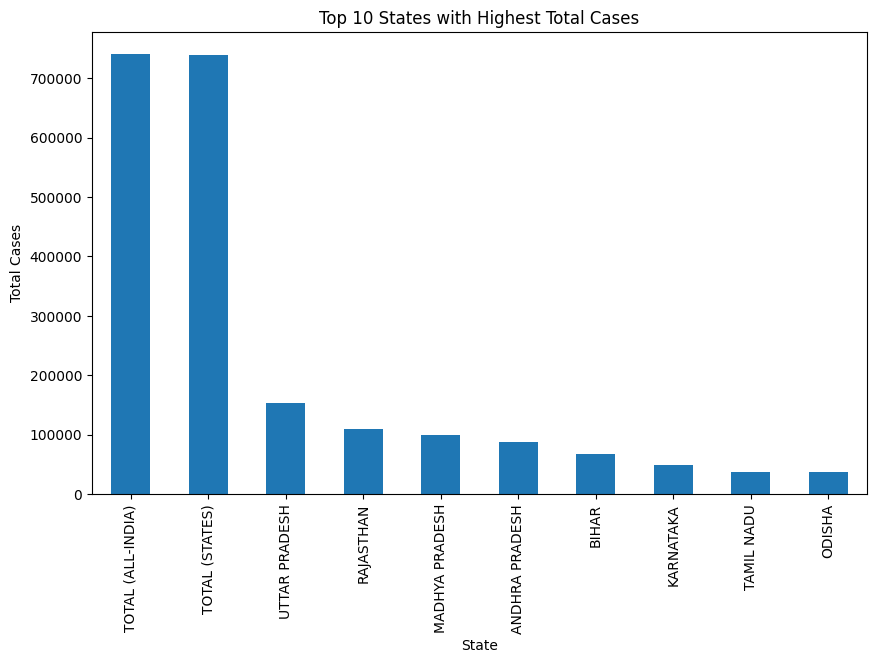

In [11]:
import matplotlib.pyplot as plt
top_10_states = state_totals.head(10)
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Top 10 States with Highest Total Cases')

In [12]:
# Group by 'STATE/UT' and sum 'VALUE' column
Crime_type_totals = df_long.groupby('CRIME HEAD')['CASES'].sum()

# Sort descending to get top states first
Crime_type_totals = Crime_type_totals.sort_values(ascending=False)

# Show top 10 states
print(Crime_type_totals.head(10))


CRIME HEAD
TOTAL CRIMES AGAINST SCs                       1110702
OTHER CRIMES AGAINST SCs                        479076
SC/ST (PREVENTION OF ATROCITIES) ACT OF SCs     373674
HURT OF SCs                                     147462
RAPE OF SCs                                      47751
MURDER OF SCs                                    23700
KIDNAPPING AND ABDUCTION OF SCs                  14034
PROTECTION OF CIVIL RIGHTS ACT FOR SCs           12810
ARSON OF SCs                                      8151
ROBBERY OF SCs                                    2859
Name: CASES, dtype: int64


Text(0.5, 1.0, 'Top 10 CRIMES with Highest Total Cases')

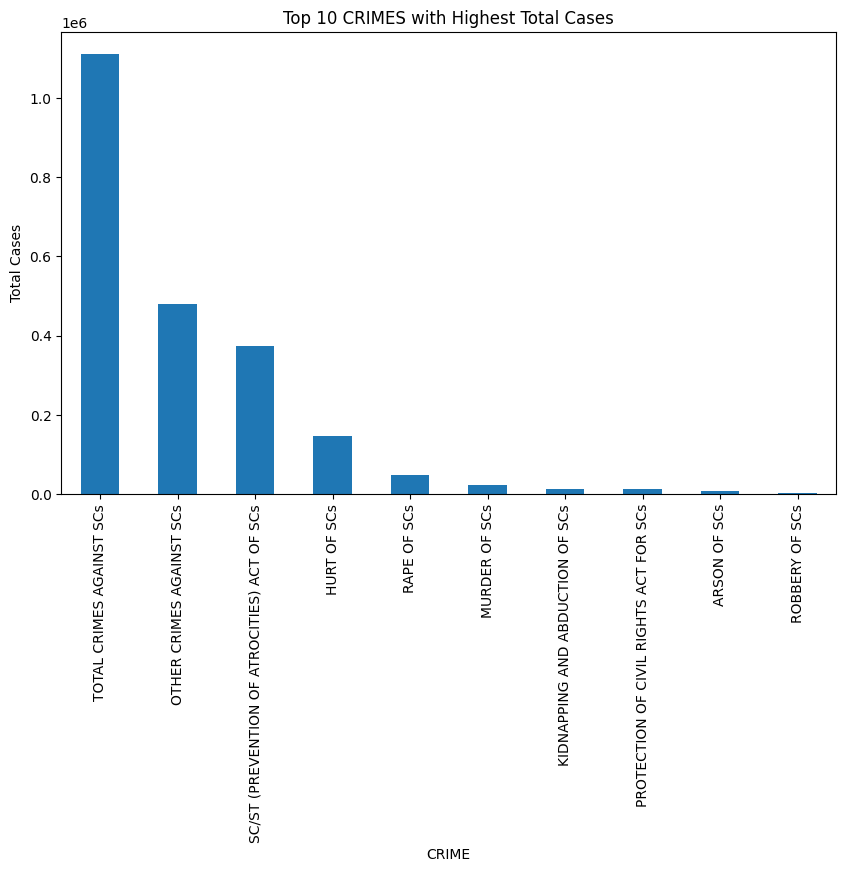

In [13]:

top_10_Crimes = Crime_type_totals.head(10)
plt.figure(figsize=(10, 6))
top_10_Crimes.plot(kind='bar')
plt.xlabel('CRIME')
plt.ylabel('Total Cases')
plt.title('Top 10 CRIMES with Highest Total Cases')

In [14]:
yearly_totals = df_long.groupby('YEAR')['CASES'].sum()
yearly_totals.head(10)


,CASES
YEAR,
2001,201006
2002,201042
2003,157512
2004,161322
2005,156762
2006,162420
2007,180186
2008,200580
2009,200472


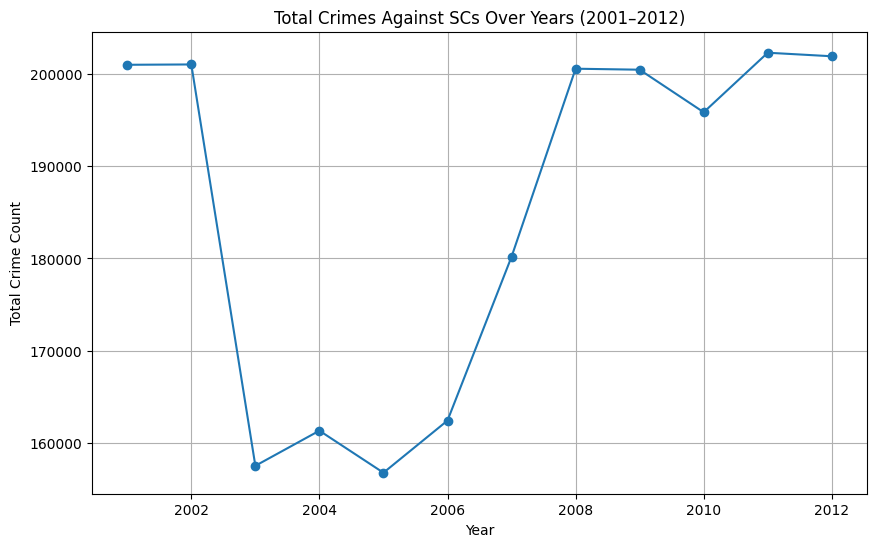

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
yearly_totals.plot(marker='o', linestyle='-')
plt.title('Total Crimes Against SCs Over Years (2001–2012)')
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.grid(True)
plt.show()


In [22]:
print(df_long.columns)


Index(['STATE/UT', 'CRIME HEAD', 'YEAR', 'CASES'], dtype='object')


## Lets predict crime count in future india

In [23]:
crime_by_year = df_long.groupby('YEAR')['CASES'].sum().reset_index()
crime_by_year['YEAR'] = crime_by_year['YEAR'].astype(int)
crime_by_year.head(10)

,YEAR,CASES
0,2001,201006
1,2002,201042
2,2003,157512
3,2004,161322
4,2005,156762
5,2006,162420
6,2007,180186
7,2008,200580
8,2009,200472
9,2010,195858


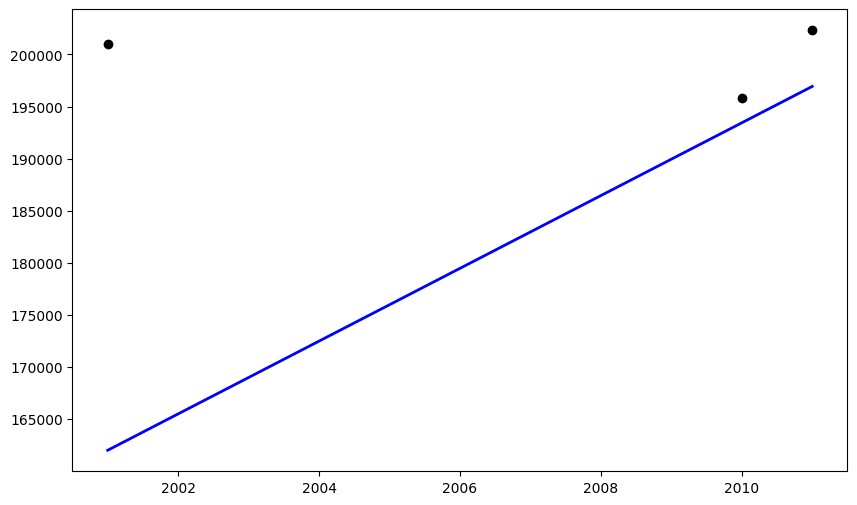

In [27]:
from re import X
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X=crime_by_year['YEAR'].values.reshape(-1,1)
y=crime_by_year['CASES'].values.reshape(-1,1)
model=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted')

In [28]:
def crime_prediction_chatbot():
    print("🔮 Crime Prediction Chatbot")
    print("Type a year between 2001 and 2020 to predict number of crimes against SCs.")
    print("Type 'exit' to stop.\n")

    while True:
        user_input = input("📅 Enter a year: ").strip()

        if user_input.lower() == 'exit':
            print("👋 Goodbye!")
            break

        if not user_input.isdigit():
            print("⚠️ Please enter a valid year (e.g., 2012).\n")
            continue

        year = int(user_input)
        year_input = np.array([[year]])
        prediction = model.predict(year_input)[0][0]

        print(f"📈 Predicted number of crimes in {year}: {int(prediction)}\n")


In [29]:
crime_prediction_chatbot()

🔮 Crime Prediction Chatbot
Type a year between 2001 and 2020 to predict number of crimes against SCs.
Type 'exit' to stop.

📅 Enter a year: 2050
📈 Predicted number of crimes in 2050: 333080

📅 Enter a year: exit
👋 Goodbye!
